(ia:ul:pca)=

# PCA



## Esempio: compressione di immagini
Un'immagine in scala di grigio può essere rappresentata con una matrice $\mathbf{A}$, i cui elementi rappresentano il valore di grigio di ogni pixel.

(-0.5, 511.5, 511.5, -0.5)

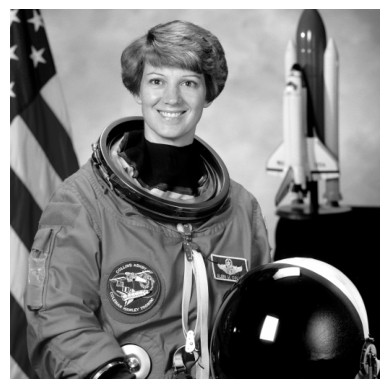

In [70]:
%reset -f
import numpy as np
import scipy as sp

from skimage import data, color
import matplotlib.pyplot as plt

#> Load image
#image = data.camera()
image = data.astronaut()
image = color.rgb2gray(image)

# Display the image
plt.imshow(image, cmap='gray')
plt.axis('off')


### Preprocessing e SVD
Viene rimosso il valore medio dall'immagine, prima di valutare la SVD della matrice $\mathbf{A}$

In [71]:
#> Preprocessing
image_avg = np.mean(image)
A = image - image_avg

#> Compute SVD
U, s, Vh = sp.linalg.svd(A, full_matrices=False)

### Risultati della SVD
I valori singolari rappresentano il contenuto energetico dei singoli modi. La somma cumulativa dei valori singolari rappresenta il contenuto energetico della 

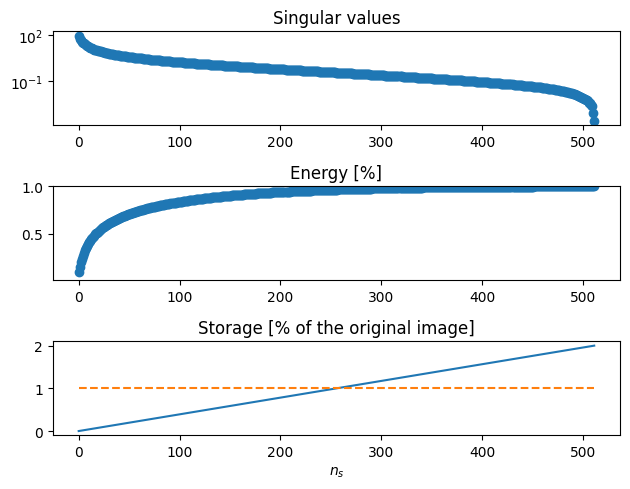

In [81]:
#> Show singular values and energy error
plt.figure()
plt.subplot(3,1,1)
plt.semilogy(s, 'o')
plt.title("Singular values")
plt.tight_layout()

energy = np.cumsum(s)
energy_error = np.sum(s) - np.cumsum(s)
plt.subplot(3,1,2)
plt.plot(energy/np.sum(s), 'o')
plt.title("Energy [%]")
plt.ylim(1e-2,1)
# plt.semilogy(energy_error/np.sum(s), 'o')
# plt.title("Energy error [%]")
# plt.ylim(1e-5,1)
plt.tight_layout()

storage = ( np.shape(image)[0] + np.shape(image)[1] ) * np.arange(len(s)) + np.arange(len(s))
original_data = np.shape(image)[0] * np.shape(image)[1]
plt.subplot(3,1,3)
plt.plot(storage/original_data, label='compressed image')
plt.plot([0, len(s)-1], [1, 1], '--', label='original_data')
plt.title("Storage [% of the original image]")
plt.tight_layout()
plt.xlabel('$n_s$')

# plt.ylim(1e-5,1)
plt.show()




### Ricostruizione dell'immagine compressa

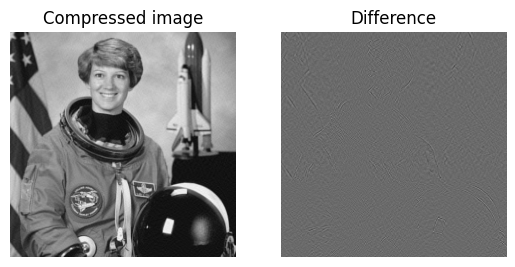

In [77]:
#> Image reconstruction
n_svd = 100
sigmaVh_svd = np.diag(s[0:n_svd]) @  Vh[0:n_svd,:]
A_svd = U[:,0:n_svd] @ sigmaVh_svd + image_avg

plt.figure()
plt.subplot(1,2,1)
plt.imshow(A_svd, cmap='gray')
plt.axis('off')
plt.title("Compressed image")

plt.subplot(1,2,2)
plt.imshow(image-A_svd, cmap='gray')
plt.axis('off')
plt.title("Difference")

plt.show()